# Venda de bebidas alcóolicas em Iowa (EUA)

dataset retirado e filtradas colunas e quantidade de registros pelo BigQuery Public Data: bigquery-public-data.iowa_liquor_sales.sales

Nesse projeto, fiz um EDA básico somente ara manipulação dos dados que extraí utilizando SQL no BigQuery.


**Variáveis:**


- date: data
- store_number: número de registro da loja
- store_name: nome da oja
- city: cidade
- category_name: categoria da bebida
- item_number: número de registro da bebida
- item_description: descrição da bebida
- pack: quantas bebidas por pack
- bottle_volume_ml: vlume em ml de cada garrafa
- state_bottle_cost: preço da garrafa de bebida no estado
- state_bottle_retail: preço da garrafa de bebida no varejo
- bottles_sold: quantidade de garrafas vendidas
- sale_dollars: venda em dolar
- volume_sold_liters: litros vendidos
- volume_sold_gallons: galões vendidos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('iowa_liquor_sales.csv')
df.head()

,date,store_number,store_name,city,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,2023-07-19,3712,MONTE SPIRITS,MONTEZUMA,SPECIAL ORDER ITEMS,903707,SOOH WISERS DELUXE,6,1750,14.99,22.49,-12,-269.88,-21.00,-5.54
1,2022-12-08,2624,HY-VEE #2 / DUBUQUE,DUBUQUE,AMERICAN FLAVORED VODKA,77683,SMIRNOFF KISSED CARAMEL,12,750,8.25,12.38,-24,-297.12,-18.00,-4.75
2,2023-07-12,4346,ROY'S FOODLAND,SHELLSBURG,CANADIAN WHISKIES,10808,CROWN ROYAL REGAL APPLE,12,1000,20.49,30.74,-12,-368.88,-12.00,-3.17
3,2022-10-24,5916,ANOTHER ROUND / DEWITT,DEWITT,STRAIGHT BOURBON WHISKIES,19067,JIM BEAM,12,1000,13.00,19.50,-12,-234.00,-12.00,-3.17
4,2023-06-07,3488,BENDER'S FOODS,BELLEVUE,STRAIGHT BOURBON WHISKIES,19067,JIM BEAM,12,1000,13.00,19.50,-12,-234.00,-12.00,-3.17


In [3]:
df.shape

(1000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1000 non-null   object 
 1   store_number         1000 non-null   int64  
 2   store_name           1000 non-null   object 
 3   city                 999 non-null    object 
 4   category_name        1000 non-null   object 
 5   item_number          1000 non-null   int64  
 6   item_description     1000 non-null   object 
 7   pack                 1000 non-null   int64  
 8   bottle_volume_ml     1000 non-null   int64  
 9   state_bottle_cost    1000 non-null   float64
 10  state_bottle_retail  1000 non-null   float64
 11  bottles_sold         1000 non-null   int64  
 12  sale_dollars         1000 non-null   float64
 13  volume_sold_liters   1000 non-null   float64
 14  volume_sold_gallons  1000 non-null   float64
dtypes: float64(5), int64(5), object(5)
memo

In [5]:
#convertendo a coluna date para datetime
pd.to_datetime(df['date'])
data_minima = df['date'].min()
data_maxima = df['date'].max()
print(data_minima)
print(data_maxima)

2018-06-04
2024-11-29


Temos dados de junho de 2018 até novembro de 2024

In [6]:
#verificando valores nulos
df.isnull().sum()

,0
date,0
store_number,0
store_name,0
city,1
category_name,0
item_number,0
item_description,0
pack,0
bottle_volume_ml,0
state_bottle_cost,0


Possuímos um valor nulo, portanto vamos retirá-lo do df

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

,0
date,0
store_number,0
store_name,0
city,0
category_name,0
item_number,0
item_description,0
pack,0
bottle_volume_ml,0
state_bottle_cost,0


In [8]:
#pocurando vlores NaN
df.isna().value_counts()

,,,,,,,,,,,,,,,count
date,store_number,store_name,city,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,999


In [9]:
# verificando os valores únicos de cada variável
valores_unicos = []
for i in df.columns[0:15].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

date : 698
store_number : 578
store_name : 591
city : 206
category_name : 29
item_number : 145
item_description : 143
pack : 11
bottle_volume_ml : 7
state_bottle_cost : 103
state_bottle_retail : 103
bottles_sold : 7
sale_dollars : 112
volume_sold_liters : 18
volume_sold_gallons : 18


Vamos filtrar nossas análises para somente as cidades com maior frequencia no df, pois analisaaremos somente elas.

In [10]:
cidades_frequentes = df['city'].value_counts()

top_cidades = cidades_frequentes.head(20).index

df_filtrado = df[df['city'].isin(top_cidades)]

df_novo = pd.DataFrame(df_filtrado)
df_novo.head()

,date,store_number,store_name,city,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1,2022-12-08,2624,HY-VEE #2 / DUBUQUE,DUBUQUE,AMERICAN FLAVORED VODKA,77683,SMIRNOFF KISSED CARAMEL,12,750,8.25,12.38,-24,-297.12,-18.00,-4.75
5,2022-12-07,5873,WEST D LIQUORS,WEST DES MOINES,IRISH WHISKIES,15628,JAMESON,6,1750,35.48,53.22,-6,-319.32,-10.50,-2.77
7,2024-08-22,2502,HY-VEE WINE AND SPIRITS (1022) / ANKENY,ANKENY,IMPORTED VODKAS,34458,KETEL ONE,6,1750,20.99,31.49,-6,-188.94,-10.50,-2.77
11,2023-11-21,4492,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,CEDAR RAPIDS,CANADIAN WHISKIES,11774,BLACK VELVET,24,375,3.25,4.88,-24,-117.12,-9.00,-2.37
13,2023-05-15,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,AMERICAN FLAVORED VODKA,76501,THE ORIGINAL PICKLE SHOT DILL PICKLE VODKA,12,750,8.34,12.51,-12,-150.12,-9.00,-2.37


In [11]:
df_novo.shape

(522, 15)

In [12]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 522 non-null    object 
 1   store_number         522 non-null    int64  
 2   store_name           522 non-null    object 
 3   city                 522 non-null    object 
 4   category_name        522 non-null    object 
 5   item_number          522 non-null    int64  
 6   item_description     522 non-null    object 
 7   pack                 522 non-null    int64  
 8   bottle_volume_ml     522 non-null    int64  
 9   state_bottle_cost    522 non-null    float64
 10  state_bottle_retail  522 non-null    float64
 11  bottles_sold         522 non-null    int64  
 12  sale_dollars         522 non-null    float64
 13  volume_sold_liters   522 non-null    float64
 14  volume_sold_gallons  522 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usa

In [13]:
df_novo.isnull().sum()

,0
date,0
store_number,0
store_name,0
city,0
category_name,0
item_number,0
item_description,0
pack,0
bottle_volume_ml,0
state_bottle_cost,0


In [14]:
df_novo.isna().sum()

,0
date,0
store_number,0
store_name,0
city,0
category_name,0
item_number,0
item_description,0
pack,0
bottle_volume_ml,0
state_bottle_cost,0


In [15]:
#lojas com maiores registros de frequencia no df
df_novo['store_name'].value_counts().head(10)

,count
store_name,
HY-VEE FOOD STORE / CEDAR FALLS,11
HY-VEE #4 / WDM,9
HY-VEE #7 / CEDAR RAPIDS,7
SUPER QUICK 2 / HUBBELL,7
"CENTRAL CITY LIQUOR, INC.",6
MARKET EXPRESS,6
KUM & GO #1113 / AMES,6
HY-VEE WINE AND SPIRITS / SHENANDOAH,6
HY-VEE WINE AND SPIRITS / WDM,6


In [16]:
# analisando as variáveis numéricas
numericas = df_novo.select_dtypes(include=['int64', 'float64'])
numericas.describe()

,store_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,522.00,522.00,522.00,522.00,522.00,522.00,522.00,522.00,522.00,522.00
mean,4427.38,42397.91,8.58,78.33,18.48,27.72,0.61,21.07,-0.17,-0.05
std,1635.89,35303.08,4.66,178.98,18.62,27.92,2.43,47.75,1.39,0.37
min,2190.00,10775.00,1.00,20.00,1.96,2.94,-24.00,-319.32,-18.00,-4.75
25%,2648.00,19021.00,5.25,50.00,6.85,10.27,1.00,9.26,0.05,0.01
50%,4492.00,26821.00,10.00,50.00,8.51,12.77,1.00,12.75,0.05,0.01
75%,5477.25,97444.75,12.00,50.00,25.50,38.25,1.00,25.20,0.05,0.01
max,10366.00,102452.00,30.00,1750.00,96.00,144.00,1.00,144.00,0.05,0.01


In [17]:
numericas.shape

(522, 10)

In [23]:
df_novo['date'] = pd.to_datetime(df_novo['date'])

#criar as colunas separadas para mês e ano
df_novo['month_number'] = df_novo['date'].dt.month
df_novo['month_name'] = df_novo['date'].dt.month_name()
df_novo['year'] = df_novo['date'].dt.year
df_novo.head()

,date,store_number,store_name,city,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,month_number,month_name,year
1,2022-12-08,2624.00,HY-VEE #2 / DUBUQUE,DUBUQUE,AMERICAN FLAVORED VODKA,77683.00,SMIRNOFF KISSED CARAMEL,12.00,50.00,8.25,12.38,1.00,-14.65,0.05,0.01,12,December,2022
5,2022-12-07,5873.00,WEST D LIQUORS,WEST DES MOINES,IRISH WHISKIES,15628.00,JAMESON,6.00,50.00,35.48,53.22,1.00,-14.65,0.05,0.01,12,December,2022
7,2024-08-22,2502.00,HY-VEE WINE AND SPIRITS (1022) / ANKENY,ANKENY,IMPORTED VODKAS,34458.00,KETEL ONE,6.00,50.00,20.99,31.49,1.00,-14.65,0.05,0.01,8,August,2024
11,2023-11-21,4492.00,CASEY'S GENERAL STORE #2773 / CEDAR RAPIDS,CEDAR RAPIDS,CANADIAN WHISKIES,11774.00,BLACK VELVET,22.12,50.00,3.25,4.88,1.00,-14.65,0.05,0.01,11,November,2023
13,2023-05-15,2572.00,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,AMERICAN FLAVORED VODKA,76501.00,THE ORIGINAL PICKLE SHOT DILL PICKLE VODKA,12.00,50.00,8.34,12.51,1.00,-14.65,0.05,0.01,5,May,2023


# Análises Gráficas

### **Visualizando as variáveis numéricas:**

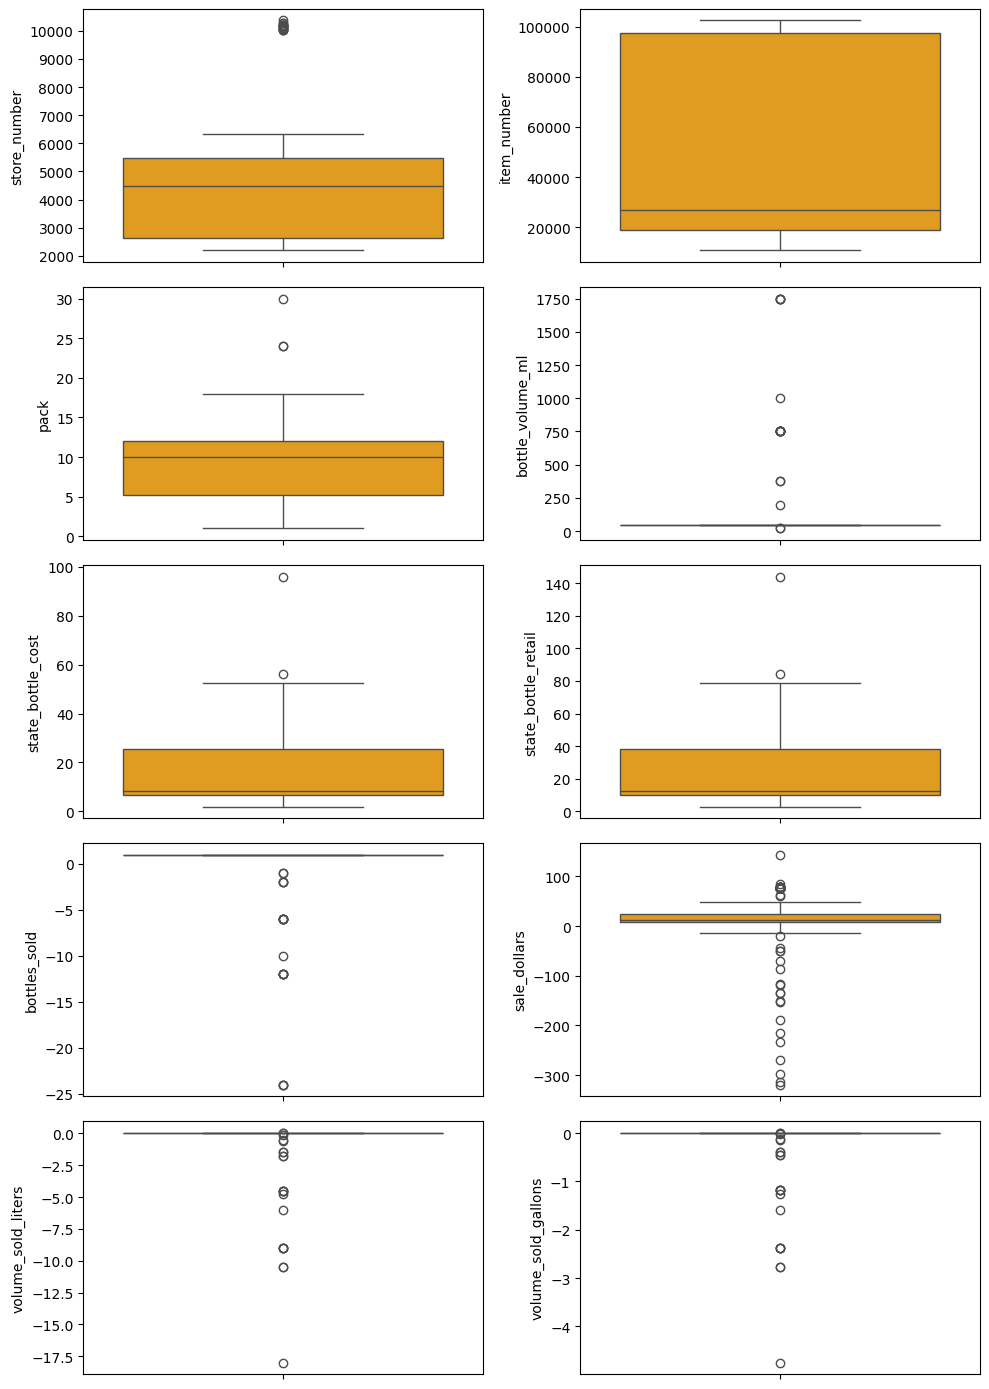

In [18]:
plt.rcParams["figure.figsize"] = [10, 14]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2) #5 linhas e 2 colunas
color = 'orange'

linha = 0
coluna = 0
for i in numericas:
    sns.boxplot(data = df_novo, y=i, ax=axes[linha][coluna], color=color)
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

Temos muitos outliers nas variáveis, portanto faremos as correções.

In [19]:
#tratando os outliers
for feature in numericas:
    Q1 = df_novo[feature].quantile(q = 0.25)
    Q3 = df_novo[feature].quantile(q = 0.75)
    IQR = Q3-Q1
    low = Q1 - 1.5*IQR
    upp = Q3 + 1.5*IQR
    df_novo[feature] = np.where(df_novo[feature]< low, low, df_novo[feature])
    df_novo[feature] = np.where(df_novo[feature]> upp, upp, df_novo[feature])

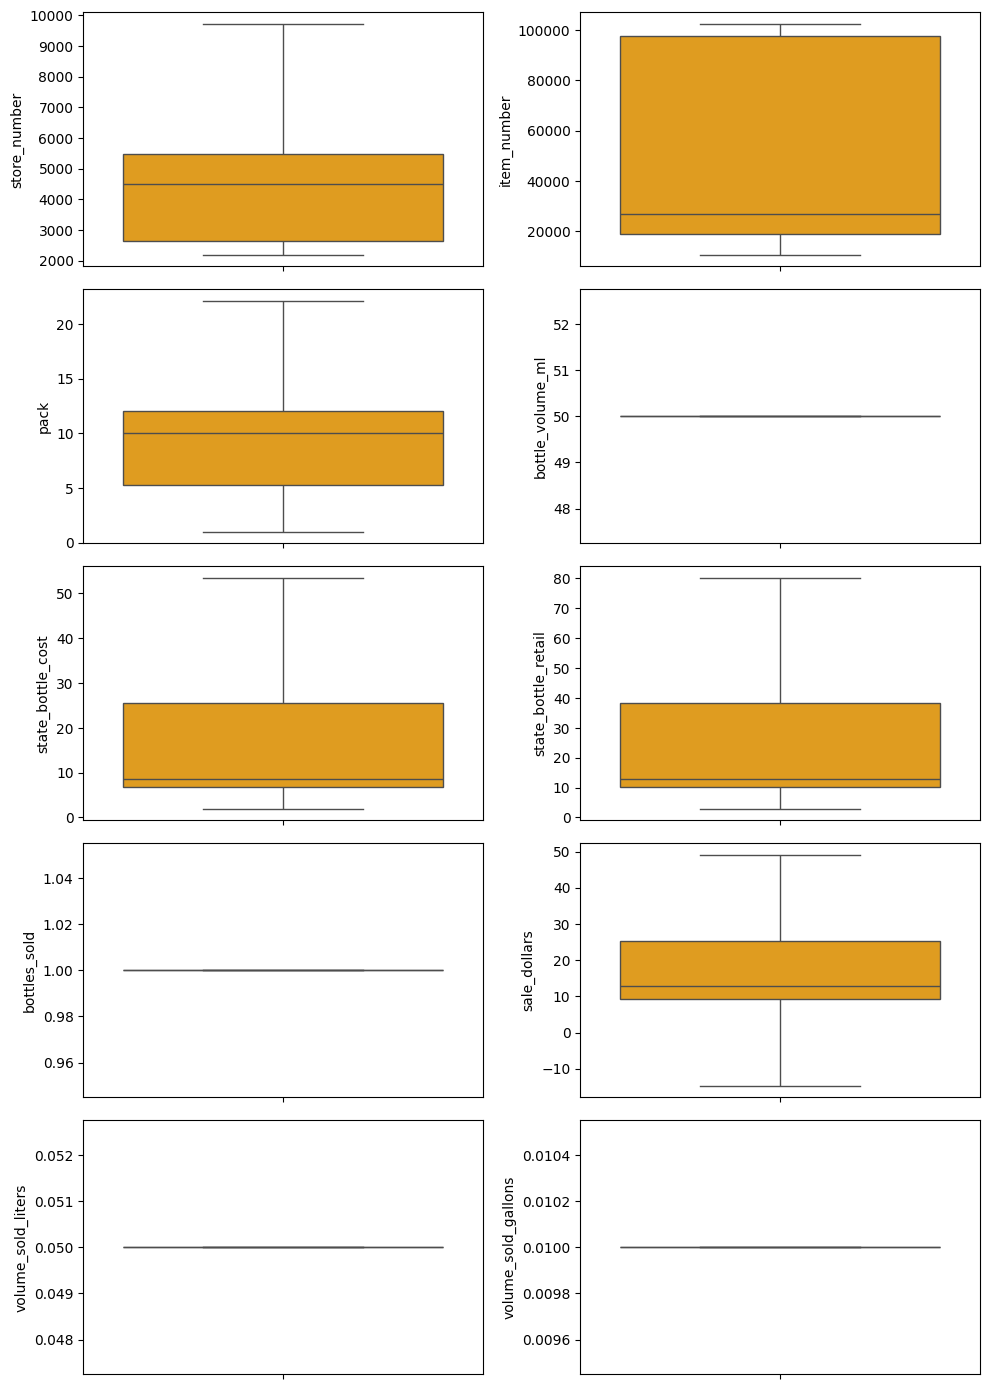

In [20]:
plt.rcParams["figure.figsize"] = [10, 14]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2) #5 linhas e 2 colunas
color = 'orange'

linha = 0
coluna = 0
for i in numericas:
    sns.boxplot(data = df_novo, y=i, ax=axes[linha][coluna], color=color)
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

### **Vendas anuais:**

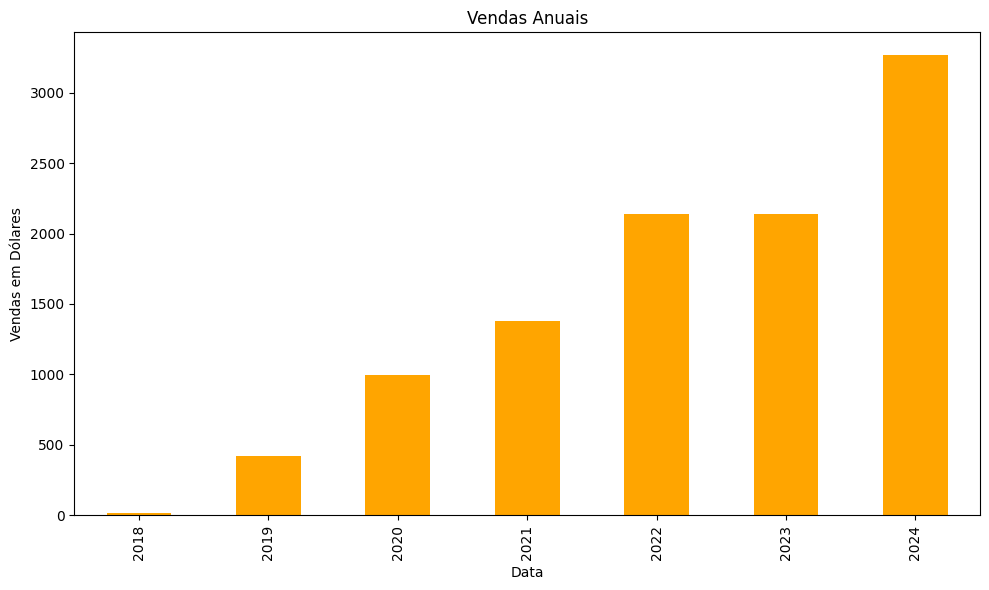

In [31]:
vendas_anuais = df_novo.groupby('year')['sale_dollars'].sum()
vendas_anuais.plot(kind = 'bar', figsize=(10, 6), color='orange')
plt.title('Vendas Anuais')
plt.xlabel('Data')
plt.ylabel('Vendas em Dólares')
plt.tight_layout()
plt.show()

### **Vendas mensais:**

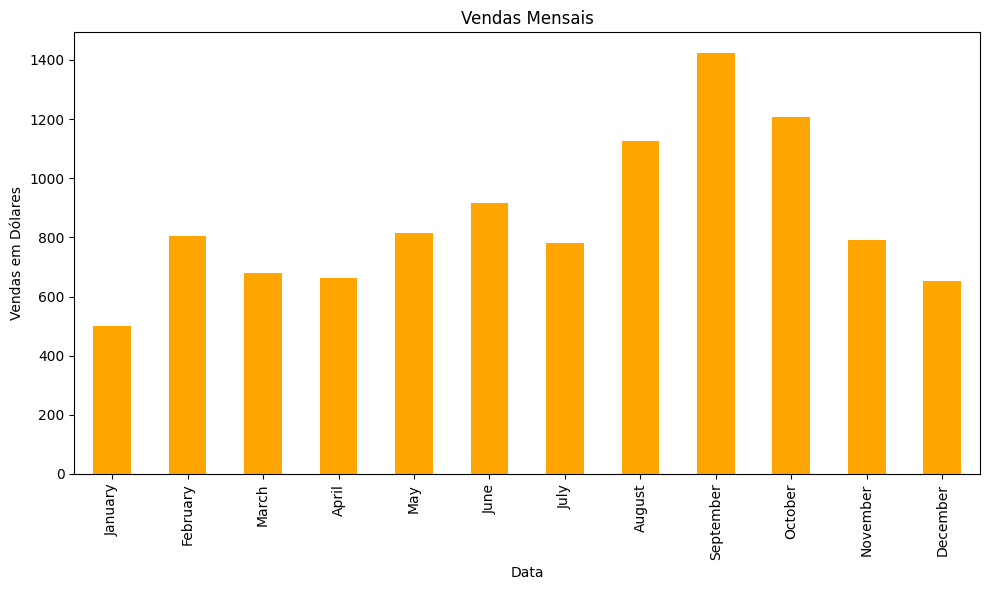

In [33]:
meses_ordem = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']


vendas_mensais = df_novo.groupby('month_name')['sale_dollars'].sum()
vendas_mensais = vendas_mensais.reindex(meses_ordem)
vendas_mensais.plot(kind = 'bar', figsize=(10, 6), color='orange')
plt.title('Vendas Mensais')
plt.xlabel('Data')
plt.ylabel('Vendas em Dólares')
plt.tight_layout()
plt.show()

### **Vendas por litro das principais lojas:**

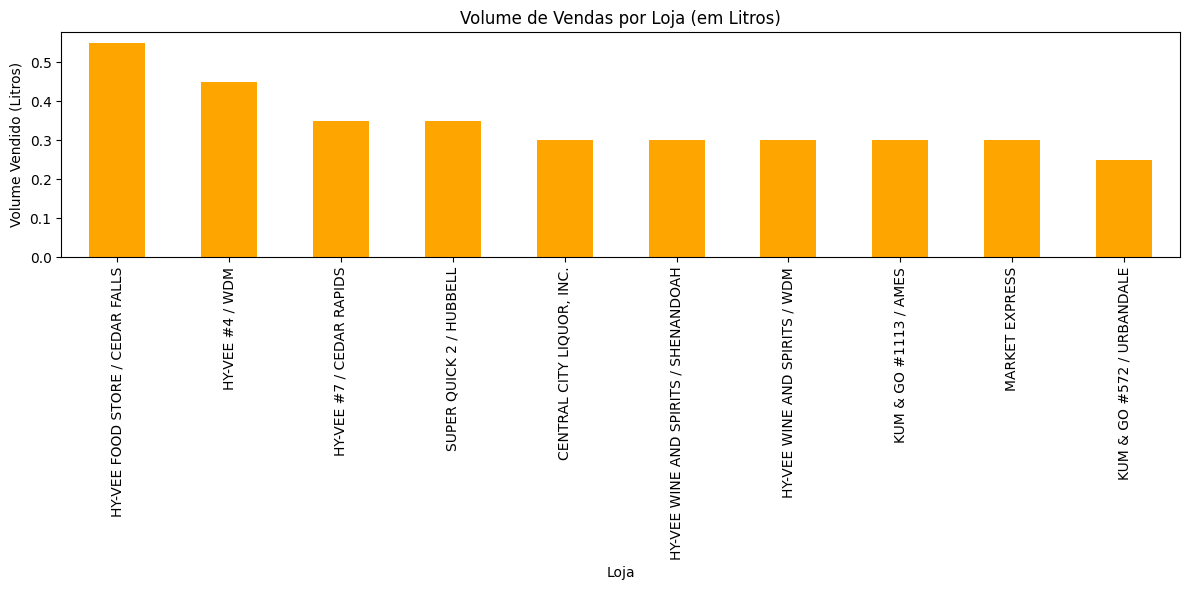

In [34]:
top_lojas = df_novo['store_name'].value_counts().head(10).index
df_top_lojas = df_novo[df_novo['store_name'].isin(top_lojas)]
volume_vendas_loja_litros = df_top_lojas.groupby('store_name')['volume_sold_liters'].sum()
volume_vendas_loja_litros = volume_vendas_loja_litros.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
volume_vendas_loja_litros.plot(kind='bar', color='orange')
plt.title('Volume de Vendas por Loja (em Litros)')
plt.xlabel('Loja')
plt.ylabel('Volume Vendido (Litros)')
plt.xticks()
plt.show()

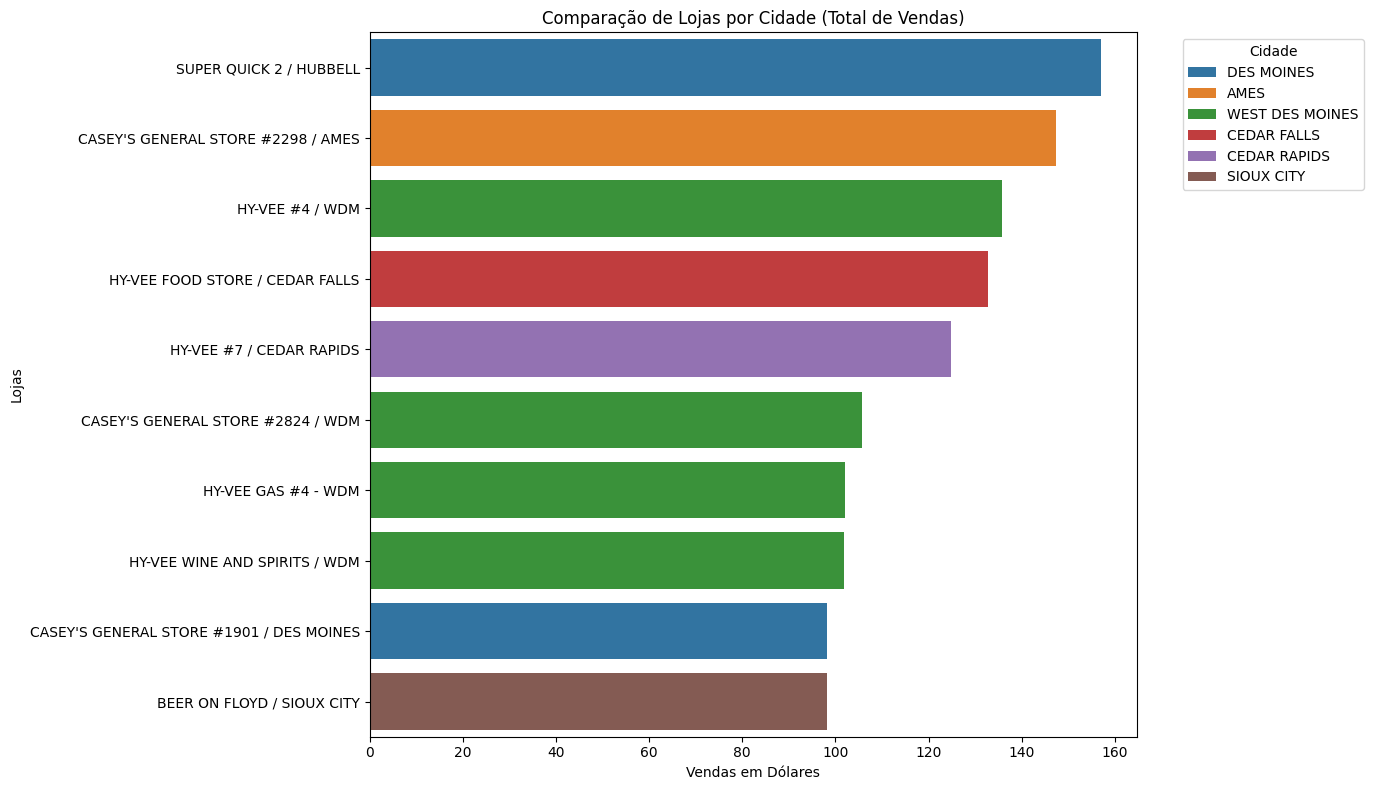

In [41]:
vendas_cidade_loja = df_novo.groupby(['city', 'store_name'])['sale_dollars'].sum().reset_index()
top_cidades = vendas_cidade_loja['city'].value_counts().head(10).index
vendas_cidade_loja = vendas_cidade_loja[vendas_cidade_loja['city'].isin(top_cidades)]
top_lojas = vendas_cidade_loja.groupby('store_name')['sale_dollars'].sum().nlargest(10).index
vendas_cidade_loja = vendas_cidade_loja[vendas_cidade_loja['store_name'].isin(top_lojas)]
vendas_cidade_loja = vendas_cidade_loja.sort_values(by='sale_dollars', ascending=False)


plt.figure(figsize=(14, 8))
sns.barplot( x='sale_dollars', y='store_name', hue='city', data=vendas_cidade_loja,dodge=False)  #evita separar barras com mesmo nome
plt.title('Comparação de Lojas por Cidade (Total de Vendas)')
plt.xlabel('Vendas em Dólares')
plt.ylabel('Lojas')
plt.legend(title='Cidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()